<a href="https://colab.research.google.com/github/Annashukla99/Extensive_comparison_of_ML_algorithm_across_diverse_data_set/blob/main/main_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
#import warnings; warnings.simplefilter('ignore')
%env JOBLIB_TEMP_FOLDER=/tmp
import seaborn as sns
from sklearn.datasets import load_digits

env: JOBLIB_TEMP_FOLDER=/tmp


In [ ]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

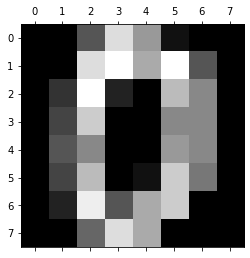

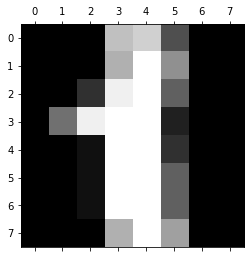

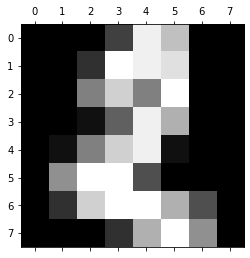

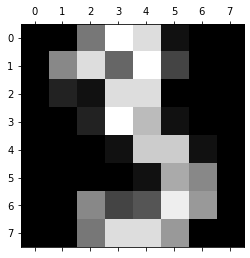

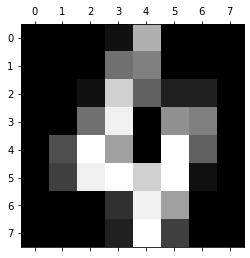

In [ ]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [ ]:
train_images=pd.read_csv("/content/drive/MyDrive/Comparison-of-Machine-Learning-Algorithms-Over-an-Image-Classifier/Data/digit-recognizer./train.csv")

In [ ]:
train_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(train_images)

42000

In [ ]:
y_train=train_images.label
y_train.head()
x_train=train_images.drop(columns=["label"])
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_': [1,5,10]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'N_B_G': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'dcsn_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,logistic_regression,0.922114,{'C': 1}
1,KNN,0.899311,{'n_estimators': 10}
2,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
3,N_B_G,0.806928,{}
4,dcsn_tree,0.813035,{'criterion': 'entropy'}


In [ ]:
x_test=pd.read_csv("/content/drive/MyDrive/Comparison-of-Machine-Learning-Algorithms-Over-an-Image-Classifier/Data/digit-recognizer./test.csv")

In [ ]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

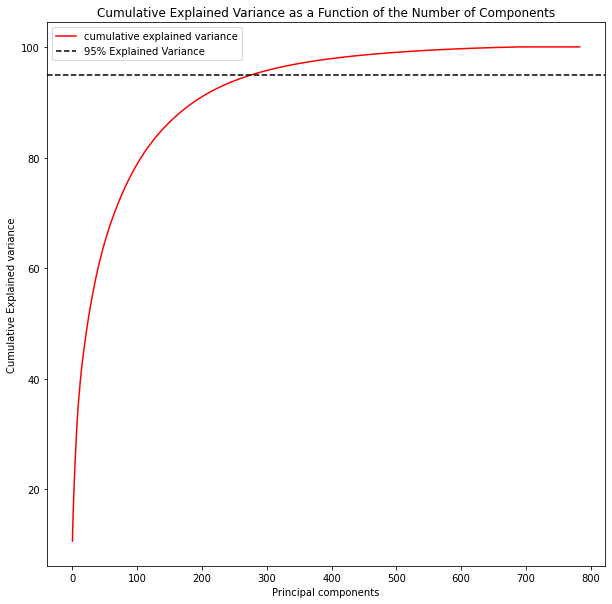

In [ ]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_test_scaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95) 
pca.fit(x_train_scaler)

x_train_pca = pca.transform(x_train_scaler)
x_test_pca = pca.transform(x_test_scaler)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# making skeletal model
logistic_regression = LogisticRegression(solver = 'lbfgs')

# Set of parameters we want to try for out Model
parameters = { 'C' : [0.1, 0.09, 0.11]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3, verbose = 2, n_jobs = -1)
grid_scores = grid_search.fit(x_train_pca , y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.9199999999999999
{'C': 0.09}


In [ ]:
from sklearn.linear_model import LogisticRegression
train_time = []
# Making the Final Classification model.
logistic_regression = LogisticRegression(solver = 'lbfgs', C = 0.1)
tick = time.time()
logistic_regression.fit(x_train_pca, y_train)
tock = time.time()
algo_time = tock - tick
print("Time taken for training a Logistic Regression model = " + str(algo_time))
train_time.append(algo_time)
print(train_time)

Time taken for training a Logistic Regression model = 14.583104372024536
[14.583104372024536]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
prediction_time = []
tick = time.time()
lr_test_predict=logistic_regression.predict(x_test_pca)
tock = time.time()
algo_time = tock - tick
print('time taken to predict the test values is :' + str(algo_time))
prediction_time.append(algo_time)
print(prediction_time)

time taken to predict the test values is :0.05194854736328125
[0.05194854736328125]


In [ ]:
y_test = x_test.iloc[:,1].values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# making model
classifier = KNeighborsClassifier()
tick = time.time()
classifier.fit(x_train_pca, y_train)
tock = time.time()
algo_time = tock - tick
print("Time taken for training a KNN = " + str(algo_time))
train_time.append(algo_time)
print(train_time)

Time taken for training a KNN = 0.021793603897094727
[14.583104372024536, 0.021793603897094727]


In [ ]:
knn_test_predict = classifier.predict(x_test_pca)
tock = time.time()
algo_time = tock - tick
print('time taken to predict the test values is :' + str(algo_time))
prediction_time.append(algo_time)
print(prediction_time)

time taken to predict the test values is :44.432979345321655
[0.05194854736328125, 44.432979345321655]


In [ ]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.9199999999999999
{'C': 0.09}


In [ ]:
from sklearn.svm import SVC
# Making the Final Classification model.
classifier = SVC( C= 10, kernel = 'poly')
tick = time.time()
classifier.fit(x_train_pca, y_train)
tock = time.time()
algo_time = tock - tick
print("Time taken for training a SVM = " + str(algo_time))
train_time.append(algo_time)
print(train_time)

Time taken for training a SVM = 182.49278616905212
[14.583104372024536, 0.021793603897094727, 182.49278616905212]


In [ ]:
svm_predict = classifier.predict(x_test_pca)
tock = time.time()
algo_time = tock - tick
print('time taken to predict the test values is :' + str(algo_time))
prediction_time.append(algo_time)
print(prediction_time)

time taken to predict the test values is :315.62137627601624
[0.05194854736328125, 44.432979345321655, 315.62137627601624]


In [ ]:
from sklearn.naive_bayes  import GaussianNB

classifier = GaussianNB()

# Making the Final Classification model.
tick = time.time()
classifier.fit(x_train_pca, y_train)
tock = time.time()
algo_time = tock - tick
print("Time taken for training a Naive Bayes = " + str(algo_time))
train_time.append(algo_time)
print(train_time)

Time taken for training a Naive Bayes = 0.2978241443634033
[14.583104372024536, 0.021793603897094727, 182.49278616905212, 0.2978241443634033]


In [ ]:
nb_predict = classifier.predict(x_test_pca)
tock = time.time()
algo_time = tock - tick
print('time taken to predict the test values is :' + str(algo_time))
prediction_time.append(algo_time)
print(prediction_time)

time taken to predict the test values is :1.125227451324463
[0.05194854736328125, 44.432979345321655, 315.62137627601624, 1.125227451324463]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# making skeletal model
classifier = DecisionTreeClassifier()

# Set of parameters we want to try for out Model
parameters = { 'min_samples_split' : [8,10,12],
               'criterion'   : ['gini','entropy']}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters , scoring = 'accuracy', cv = 3, verbose = 2, n_jobs = -1)
grid_scores = grid_search.fit(x_train_pca , y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Making the Final Classification model.
classifier = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 12 )
tick = time.time()
classifier.fit(x_train_pca, y_train)
tock = time.time()
algo_time = tock - tick
print("Time taken for training a Decision Tree = " + str(algo_time))
train_time.append(algo_time)
print(train_time)

Time taken for training a Decision Tree = 90.19129586219788
[14.583104372024536, 0.021793603897094727, 182.49278616905212, 0.2978241443634033, 90.19129586219788]


In [ ]:
dt_predict = classifier.predict(x_test_pca)
tock = time.time()
algo_time = tock - tick
print('time taken to predict the test values is :' + str(algo_time))
prediction_time.append(algo_time)
print(prediction_time)

time taken to predict the test values is :90.24687004089355
[0.05194854736328125, 44.432979345321655, 315.62137627601624, 1.125227451324463, 90.24687004089355]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


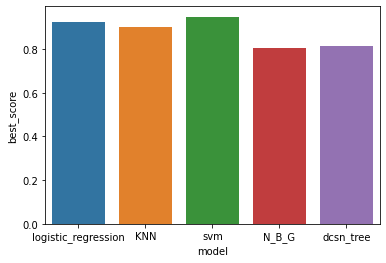

In [ ]:
sns.barplot('model','best_score',data=df1)

In [ ]:
'''df = pd.DataFrame({   
                          'Train_Time'      : train_time,
                          'Prediction_time' : prediction_time,
                          'Algorithm'       : ['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree']})
print(df)'''

"df = pd.DataFrame({   \n                          'Train_Time'      : train_time,\n                          'Prediction_time' : prediction_time,\n                          'Algorithm'       : ['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree']})\nprint(df)"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


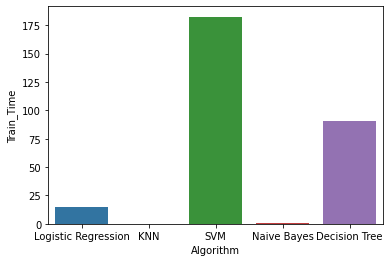

In [ ]:
sns.barplot('Algorithm','Train_Time', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


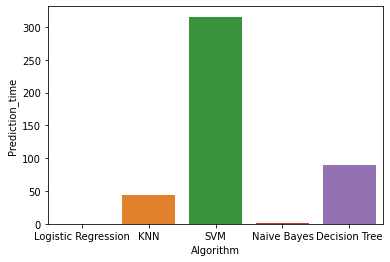

In [ ]:
sns.barplot('Algorithm','Prediction_time', data = df)